# Anomaly Detection in Wireless Sensor Network using DBSCAN Algorithm
# Dataset = Intel Berkley Research Lab Sensor Data
[Click Me for Dataset](https://www.kaggle.com/divyansh22/intel-berkeley-research-lab-sensor-data)

# About DBSCAN
Density-Based Clustering refers to unsupervised learning methods that identify distinctive groups/clusters in the data, based on the idea that a cluster in data space is a contiguous region of high point density, separated from other such clusters by contiguous regions of low point density.

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.

The DBSCAN algorithm uses two parameters:

minPts: The minimum number of points (a threshold) clustered together for a region to be considered dense.
eps (ε): A distance measure that will be used to locate the points in the neighborhood of any point.


In [39]:
# Importing the Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import DBSCAN
from sklearn import metrics
from pylab import rcParams


##About the Dataset
This file includes a log of about 10000 million readings collected from the 54 sensors installed in the lab. There are 8 columns in this csv file and the columns included are date:yyyy-mm-dd, time:hh:mm:ss.xxx, epoch:int, moteid:int, temperature:real, humidity:real, light:real, voltage:real.


Epoch is a monotonically increasing sequence number from each mote. Two readings from the same epoch number were produced from different motes at the same time. There are some missing epochs in this data set. 

Moteids range from 1-54; data from some motes may be missing or truncated. 

Temperature is in degrees Celsius. 

Humidity is temperature corrected relative humidity, ranging from 0-100%. 

Light is in Lux (a value of 1 Lux corresponds to moonlight, 400 Lux to a bright office, and 100,000 Lux to full sunlight.) 

Voltage is expressed in volts, ranging from 2-3; the batteries, in this case, were lithium-ion cells that maintain a fairly constant voltage over their lifetime; note that variations in voltage are highly correlated with temperature.

In [40]:
# Reading the Data
df = pd.read_csv("ClusteredData.csv")
df.head(100)

,Unnamed: 0,NODEID,x_coord,y_coord,FCH,CH,ClusterNumber
0,0,0,10,7,-1.000000,0,-1
1,1,1,37,73,-1.000000,0,-1
2,2,2,87,8,-1.000000,0,-1
3,3,3,8,96,0.998858,1,0
4,4,4,8,57,-1.000000,0,-1
...,...,...,...,...,...,...,...
95,95,95,34,78,-1.000000,0,-1
96,96,96,50,3,-1.000000,0,-1
97,97,97,38,16,-1.000000,0,-1
98,98,98,31,64,-1.000000,0,-1


# Info about the Data

In [41]:
df.describe()

,Unnamed: 0,NODEID,x_coord,y_coord,FCH,CH,ClusterNumber
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,49.500000,49.500000,50.390000,47.750000,-0.384951,0.08000,0.490000
std,29.011492,29.011492,28.895806,28.090897,0.881176,0.27266,2.694907
min,0.000000,0.000000,2.000000,3.000000,-1.000000,0.00000,-1.000000
25%,24.750000,24.750000,27.750000,23.000000,-1.000000,0.00000,-1.000000
50%,49.500000,49.500000,47.000000,49.500000,-1.000000,0.00000,-1.000000
75%,74.250000,74.250000,74.250000,71.000000,0.826494,0.00000,0.250000
max,99.000000,99.000000,100.000000,100.000000,0.998858,1.00000,8.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     100 non-null    int64  
 1   NODEID         100 non-null    int64  
 2   x_coord        100 non-null    int64  
 3   y_coord        100 non-null    int64  
 4   FCH            100 non-null    float64
 5   CH             100 non-null    int64  
 6   ClusterNumber  100 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


# Plotting the Initial Data Values

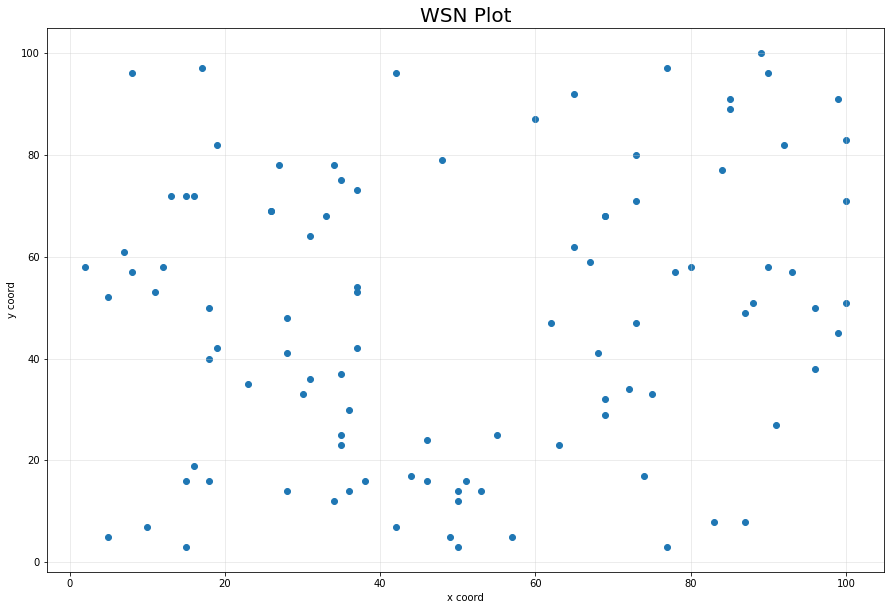

In [43]:
plt.figure(figsize=(15,10))
plt.scatter(df['x_coord'], df['y_coord'])
plt.grid(which='major', color='#cccccc', alpha = 0.45)
plt.title('WSN Plot', fontsize=20)
plt.xlabel('x coord')
plt.ylabel('y coord')
plt.show()

In [44]:
# Importing DBSCAN from sklearn
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=30, min_samples=11)

In [45]:
X = df.iloc[:, [2, 3]].values # selecting all entries of Temperature and Humidity Column
X[0:50] # printing first 10 entries of the list

array([[ 10,   7],
       [ 37,  73],
       [ 87,   8],
       [  8,  96],
       [  8,  57],
       [ 37,  54],
       [100,  51],
       [ 68,  41],
       [ 12,  58],
       [ 77,   3],
       [ 89, 100],
       [ 87,  49],
       [ 34,  12],
       [ 73,  80],
       [ 63,  23],
       [ 37,  53],
       [ 69,  68],
       [ 50,  12],
       [ 27,  78],
       [ 73,  47],
       [ 96,  38],
       [ 67,  59],
       [ 90,  96],
       [ 26,  69],
       [ 18,  16],
       [ 69,  32],
       [ 35,  25],
       [ 17,  97],
       [ 99,  45],
       [ 35,  75],
       [ 88,  51],
       [ 73,  71],
       [ 15,  72],
       [ 50,  14],
       [ 36,  14],
       [  5,  52],
       [ 65,  92],
       [ 23,  35],
       [ 69,  29],
       [ 57,   5],
       [ 30,  33],
       [ 31,  36],
       [ 11,  53],
       [ 35,  23],
       [ 16,  19],
       [ 55,  25],
       [ 46,  16],
       [ 13,  72],
       [ 48,  79],
       [ 53,  14]])

# Training the Model

In [46]:
model = dbscan.fit(X) 
model

DBSCAN(eps=30, min_samples=11)

# Prining labels
*   **-ve points represents the outliers they do not fall under any cluster**
*   
others denote the cluster 0th, 1th, 2th,...8th cluster



In [47]:
labels = model.labels_
for i in range (0,100):
  print("Iteration : {}  Label : {}".format(i,labels[i]))

Iteration : 0  Label : 0
Iteration : 1  Label : 0
Iteration : 2  Label : 0
Iteration : 3  Label : 0
Iteration : 4  Label : 0
Iteration : 5  Label : 0
Iteration : 6  Label : 0
Iteration : 7  Label : 0
Iteration : 8  Label : 0
Iteration : 9  Label : 0
Iteration : 10  Label : 0
Iteration : 11  Label : 0
Iteration : 12  Label : 0
Iteration : 13  Label : 0
Iteration : 14  Label : 0
Iteration : 15  Label : 0
Iteration : 16  Label : 0
Iteration : 17  Label : 0
Iteration : 18  Label : 0
Iteration : 19  Label : 0
Iteration : 20  Label : 0
Iteration : 21  Label : 0
Iteration : 22  Label : 0
Iteration : 23  Label : 0
Iteration : 24  Label : 0
Iteration : 25  Label : 0
Iteration : 26  Label : 0
Iteration : 27  Label : 0
Iteration : 28  Label : 0
Iteration : 29  Label : 0
Iteration : 30  Label : 0
Iteration : 31  Label : 0
Iteration : 32  Label : 0
Iteration : 33  Label : 0
Iteration : 34  Label : 0
Iteration : 35  Label : 0
Iteration : 36  Label : 0
Iteration : 37  Label : 0
Iteration : 38  Label 

# Visualizing Results
Separate outliers from cluster data


In [48]:
outliers_df = df[model.labels_== -1] #-1 stands for outlier
clusters_df = df[model.labels_ != -1]

In [49]:
outliers_df

,Unnamed: 0,NODEID,x_coord,y_coord,FCH,CH,ClusterNumber


In [50]:
outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     0 non-null      int64  
 1   NODEID         0 non-null      int64  
 2   x_coord        0 non-null      int64  
 3   y_coord        0 non-null      int64  
 4   FCH            0 non-null      float64
 5   CH             0 non-null      int64  
 6   ClusterNumber  0 non-null      int64  
dtypes: float64(1), int64(6)
memory usage: 0.0 bytes


In [51]:
clusters_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     100 non-null    int64  
 1   NODEID         100 non-null    int64  
 2   x_coord        100 non-null    int64  
 3   y_coord        100 non-null    int64  
 4   FCH            100 non-null    float64
 5   CH             100 non-null    int64  
 6   ClusterNumber  100 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 6.2 KB


In [52]:
colors = model.labels_
colors_clusters = colors[colors != -1]
colors_outliers = 'yellow' # for outliers set yellow color

# Core Points, Number of Clusters


In [53]:
#Get the info about clusters
clusters = Counter(model.labels_)
print(clusters)
print(df[model.labels_ == -1].head(10))
print('Number of clusters = {}'.format(len(clusters)-1))

Counter({0: 100})
Empty DataFrame
Columns: [Unnamed: 0, NODEID, x_coord, y_coord, FCH, CH, ClusterNumber]
Index: []
Number of clusters = 0


In [54]:
df.columns

Index(['Unnamed: 0', 'NODEID', 'x_coord', 'y_coord', 'FCH', 'CH',
       'ClusterNumber'],
      dtype='object')

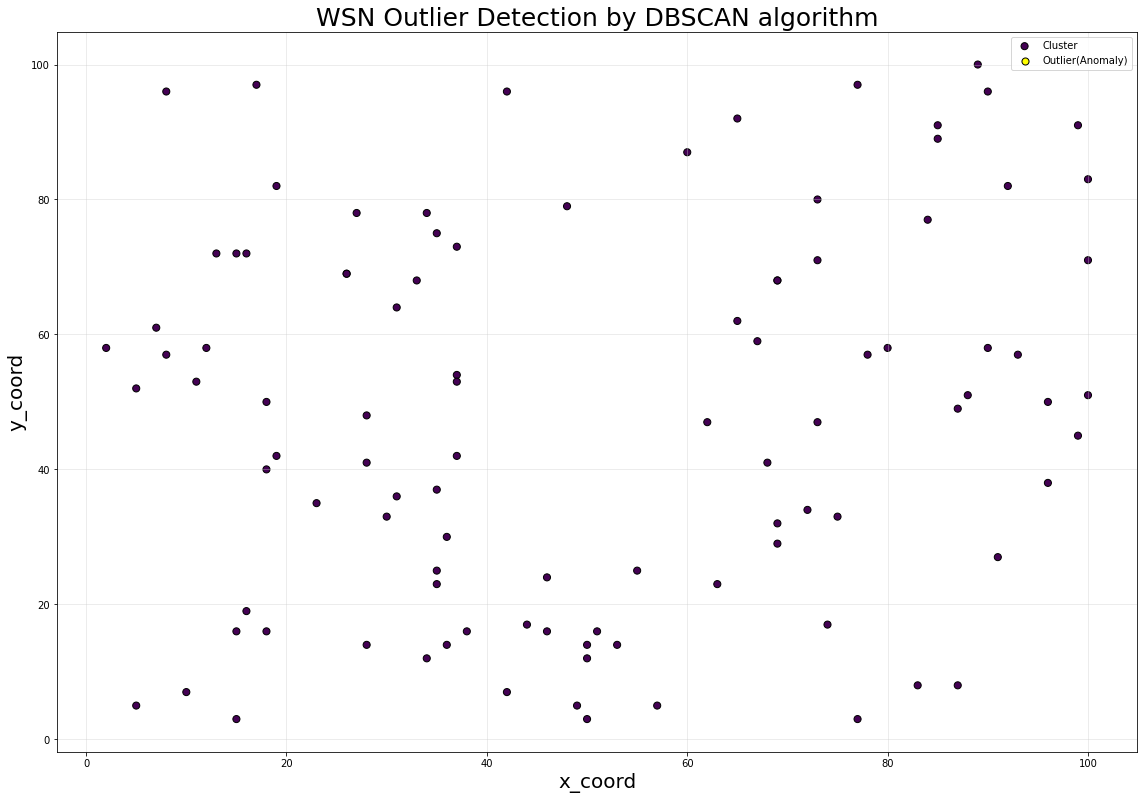

In [55]:
# Black Point shows the Outliers
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([.1,.1,1,1])

ax.scatter(clusters_df['x_coord'], clusters_df['y_coord'],
           c = colors_clusters, edgecolors='black', s=50,label = "Cluster")
ax.scatter(outliers_df['x_coord'], outliers_df['y_coord'],
           c = colors_outliers, edgecolors='black', s=50,label = "Outlier(Anomaly)")

ax.set_xlabel('x_coord', fontsize=20)
ax.set_ylabel('y_coord', fontsize=20) 

plt.title('WSN Outlier Detection by DBSCAN algorithm', fontsize=25)

plt.grid(which='major', color='#cccccc', alpha = 0.45)
plt.legend()
plt.show()

In [56]:
model.metric

'euclidean'

## Data Transmission after Anomaly Detection
for data transmission, we have to basically transfer the message signal to the base station.
For that we have to consider all type of energies that are dissipated during transmission.

1.   Transmitter Circuitry Energy ( Etx)
2.   Receiver Circuitry Energy ( Erx)
3.   Amplification Energy( Eamp)

---
We consider followinfg initial energy of each node.


1.   Transmission - 50nj/bit
2.   Receiving - 50nj/bit
3.   Amplification - 100pj/bit/m^2


In [58]:
# Node Class
class Node:
    def __init__(self):
        self.position = {
            'x': None,
            'y': None
        }[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 14]]
        self.is_CH = False
        self.power = 0.75
        self.is_dead = False
        self.last_CH_round = None
        self.closest_CH = {
            'node_id': None,
            'dist': None
        }

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 8)

In [ ]:
# Network class
class Network:
    def __init__(self):
        self.dimentions = {
            'x': 100,
            'y': 100
        }
        self.no_of_nodes = 100
        self.percentage_CH = 0.05 # percentage of nodes to become CH in each round
        self.nodes = [Node() for i in range(self.no_of_nodes)]
        self.current_round_number = 0
        for i in range(self.no_of_nodes):

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
print(distances[0:50])
distances = distances[:,3]
plt.plot(distances)
plt.show()

In [ ]:
model.fit_predict

In [ ]:
!pip install kneed

In [ ]:
y = distances
x = range(0, len(y))

In [ ]:
from kneed import KneeLocator
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print(kn.knee)

import matplotlib.pyplot as plt
plt.xlabel('TEMPERATURE')
plt.ylabel('HUMMIDITY')
plt.plot(x, y, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')